In [8]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from svm_source import frontiere, rand_gauss, rand_bi_gauss, plot_2d

from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets

from time import time
import pylab as pl
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.datasets import fetch_lfw_people


# Questions 1&2

Comparing Linear and Polynomial -kernel based SVM

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

In [10]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.5, random_state=0)

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Score for a Linear kernel: %s' % score)


Score for a Linear kernel: 0.66


In [11]:
clf = SVC(kernel="poly")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Score for a Polynomial kernel: %s' % score)


Score for a Polynomial kernel: 0.7


Polynomial kernel-based SVM yields a better prediction than using a Linear kernel.

# Question 3

The primal problem of SVM is solving:
\begin{align}
(w^{*},w_{0},\xi^{*} \in \mathbf{R^n}) \in argmin_{w\in\mathbb{H},w_{0}\in\mathbb{R},\xi\in\mathbb{R}^n}({\frac{1}{2}\|w\|^{2}+C\sum_{i=1}^{n}{\xi_i}})\\
&\xi_{i}\geq{0} \\
&\xi_{i}\geq{1-y_{i}(\Phi(x_i)^{T}w+w_{0})}
\end{align}
wich is equivalent to 
\begin{align}
argmin_{w\in\mathbb{H},w_{0}\in\mathbb{R},\xi\in\mathbb{R}^n}({\frac{1}{2}\|w\|^{2}+C\sum_{i=1}^{n}{\xi_i}}) \\
&\xi_{i}\geq{max(0,1-y_{i}(\Phi(x_i)^{T}w+w_{0}))} 
\end{align}
The conditions give
\begin{equation}
\forall{\xi\in\mathbb{R}^n},\sum_{i=1}^{n}{\xi_i}\geq{\sum_{i=1}^{n}{max(0,1-y_{i}(\Phi(x_i)^{T}w+w_{0}))}}
\end{equation}

As $C>0$, the optimal $\xi$ is obtained for $\xi_i=max(0,1-y_{i}(\Phi(x_i)^{T}w+w_{0})$

The problem is thus equivalent to
$\begin{equation}
argmin_{w\in\mathbb{H},w_{0}\in\mathbb{R}}(\frac{1}{2}\|w\|^{2}+C\sum_{i=1}^{n}{max(0,1-y_{i}(\Phi(x_i)^{T}w+w_{0}}))) 
\end{equation}$

# Question 4

$$ \begin{array}{ccccc}
Let & f & : & m & \mapsto & 1 & if & m & = & 0 \\
 & & & & 0 & otherwise & & &  \\
\end{array}$$


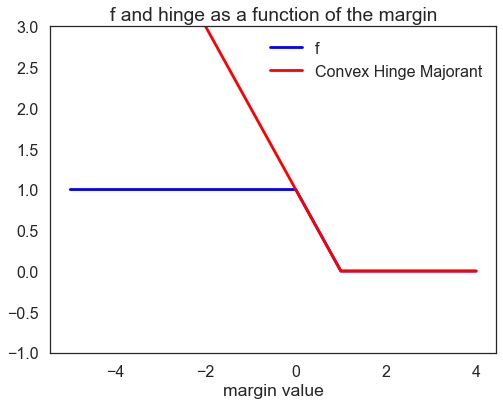

In [41]:
def f(m):
    if m <= 0:
        return 1
    return 0

def Hinge(x):
    return max(0, 1-x)

#We plot f
yy_val = []
yy_val2 = []
val = [i for i in range(-5, 5)]
for i in range(len(val)):
    yy_val.append(f(val[i]))
    yy_val2.append(Hinge(val[i]))
plt.plot(val, yy_val, color='blue', label='f')
plt.plot(val, yy_val2, color='red', label='Convex Hinge Majorant')
plt.ylim(-1, 3)
plt.xlabel('margin value')
plt.title('f and hinge as a function of the margin')
plt.legend()

# WARNING

For the following cells to be displayed, you MUST NOT execute them, as I am not allowed to send the folder containing the PGNs with the .ipynb file.

# SVM GUI

The initial distribution of points is the following :

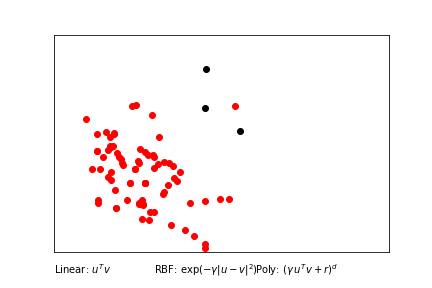

In [12]:
from IPython.display import Image
Image("Images_TP1/1.png")

For C = 1 : 


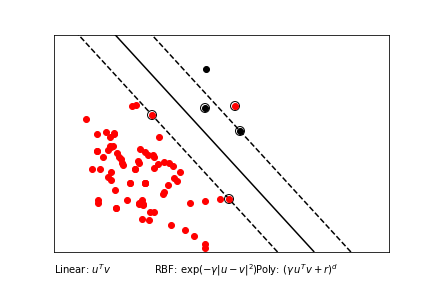

In [13]:
print("For C = 1 : ")
Image("Images_TP1/1C1.png")


For C = 0.1 : 


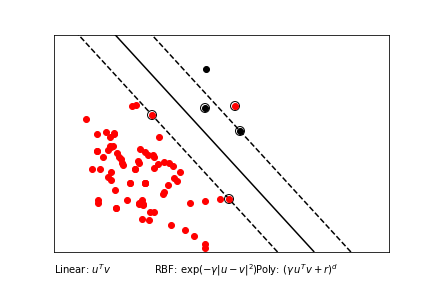

In [14]:
print("For C = 0.1 : ")
Image("Images_TP1/2C0.1.png")


For C = 0.01 : 


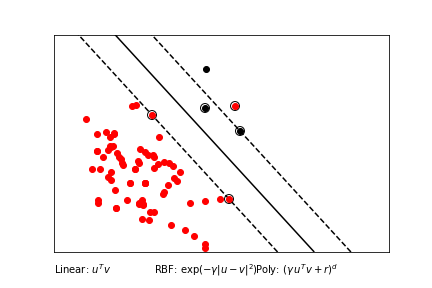

In [15]:
print("For C = 0.01 : ")
Image("Images_TP1/3C0.01.png")


For C = 0.001 : 


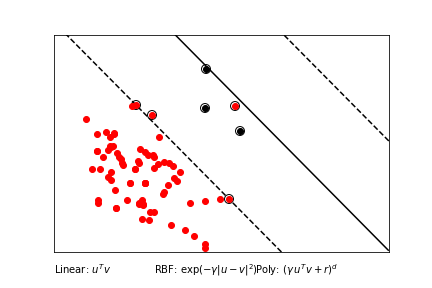

In [16]:
print("For C = 0.001 : ")
Image("Images_TP1/4C0.001.png")


For C = 0.0001 : 


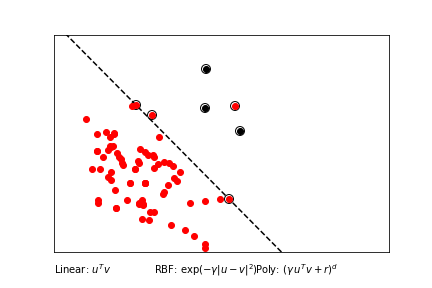

In [17]:
print("For C = 0.0001 : ")
Image("Images_TP1/5C0.0001.png")


For a low enough value of C, all the data points in the lesser class are mismatched : They are contained in the hyperspace of the class with many points. The problem here is that the "weight" of the class with many points is much more important in the determination of the margin, so the points of the lesser class are neglected.

The problem in the example shown above is even more severe : all the points in the space will be recognized as points of the class with more points, regardless of their actual class.

# Question 5

Download the data

In [18]:
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
# text.usetex is set as False by default to avoid problems with student computers
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()

####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:int(X.shape[0] / 2)], indices[int(X.shape[0] / 2):]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]

We will now analyze the prediction error as a function of C

In [19]:
import pandas as pd

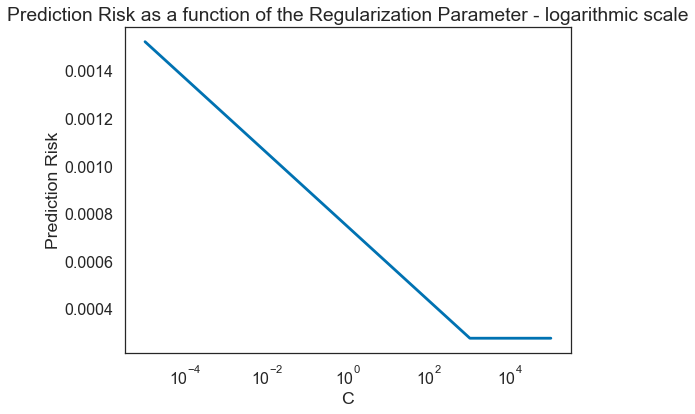

In [20]:
def fit_model(c):
    clf = SVC(C=c,kernel='linear',class_weight="balanced")
    clf.fit(X_train, y_train)

    # predict labels for the test data base
    y_pred = clf.predict(X_test)

    # check your score
    prediction_risk = np.average([(y_pred[k]-y_test[k])**2 for k in range(len(y_pred))])/len(y_pred)
    #print('Score : %s' % score)
    # display the frontiere
    return prediction_risk

absciss = pd.Series(np.linspace(10**(-5),10**(5),100))
ordinate = absciss.map(lambda x:fit_model(x))

plt.plot(absciss,ordinate)
plt.title("Prediction Risk as a function of the Regularization Parameter - logarithmic scale")
plt.xlabel("C")
plt.ylabel("Prediction Risk")
plt.xscale('log')

# Question 6

We will now add random variables to the X_train and X_test data points.

In [21]:
#Variables correspond to X_train[:,i] and X_test[:,i]
import numpy.random as rd

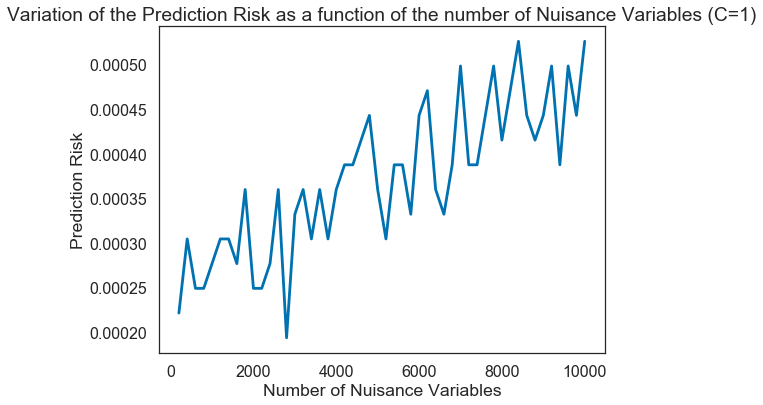

In [22]:
#If the cell takes too much time to run,  increase the step in range(200,10000,200)

#For this question, we will use a fixed C=1
#We iterate over the number of nuisance variables we will create
def nuisance_plot():
    absciss = [i for i in range(200,10001,200)]
    ordinate = []
    for iterator in range(200,10001,200):
        train_nuisance = np.array([[rd.randn() for i in range(iterator)] for i in range(190)])
        train_nuisance -= np.mean(train_nuisance, axis=0)
        train_nuisance /= np.std(train_nuisance, axis=0)

        test_nuisance = np.array([[rd.randn() for i in range(iterator)] for i in range(190)])
        test_nuisance -= np.mean(test_nuisance, axis=0)
        test_nuisance /= np.std(test_nuisance, axis=0)
        
        X_train_nuisance = pd.concat([pd.DataFrame(X_train.T),pd.DataFrame(train_nuisance.T)]).transpose()
        X_test_nuisance  = pd.concat([pd.DataFrame(X_test.T),pd.DataFrame(test_nuisance.T)]).transpose()
        
        clf = SVC(C=1,kernel='linear',class_weight="balanced")
        clf.fit(X_train_nuisance, y_train)
        y_pred = clf.predict(X_test_nuisance)
        prediction_risk = np.average([(y_pred[k]-y_test[k])**2 for k in range(len(y_pred))])/len(y_pred)
        ordinate.append(prediction_risk)
    plt.plot(absciss,ordinate)
    plt.title("Variation of the Prediction Risk as a function of the number of Nuisance Variables (C=1)")
    plt.xlabel("Number of Nuisance Variables")
    plt.ylabel("Prediction Risk")
    #plt.xscale('log')
    
nuisance_plot()

# Question 7

We need to scale the features to avoid attributes in greater numeric ranges dominating those in smaller numeric ranges. Another advantage is to avoid numerical dificulties during the calculation. Because kernel values usually depend on the inner products of feature vectors, e.g. the linear kernel and the polynomial kernel, large attribute values might cause numerical problems.

# Question 8

In general using the TBF kernel improves the prediction for face recognition problems because it selects solutions that are smooth (as is the case for faces with many pixels).

In [23]:
clf = SVC(class_weight="balanced",kernel="rbf")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Score for a RBF kernel: %s' % score)

Score for a RBF kernel: 0.8842105263157894


In [24]:
from sklearn.decomposition import PCA
#RandomizedPCA is depreciated, so we will use PCA with randomized svd_solver, which is the same thing.
pca = PCA(svd_solver = 'randomized')

pca_X = pca.fit_transform(X.T).T

pca_X_train, pca_X_test = pca_X[train_idx, :], pca_X[test_idx, :]


clf = SVC(class_weight="balanced",kernel="rbf")
clf.fit(pca_X_train, y_train)
score = clf.score(pca_X_test, y_test)
print('Score for a RBF kernel after randomized PCA: %s' % score)


Score for a RBF kernel after randomized PCA: 0.9473684210526315


In [25]:
clf = SVC(class_weight="balanced",kernel="linear")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Score for a Linear kernel: %s' % score)

clf = SVC(class_weight="balanced",kernel="poly")
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Score for a Polynomial kernel: %s' % score)


Score for a Linear kernel: 0.9473684210526315
Score for a Polynomial kernel: 0.8


The prediction RBF kernel with randomized PCA yields as good as or a better prediction than the other kernels.

# Question 9

We calculate the values of the primal and dual objective function values

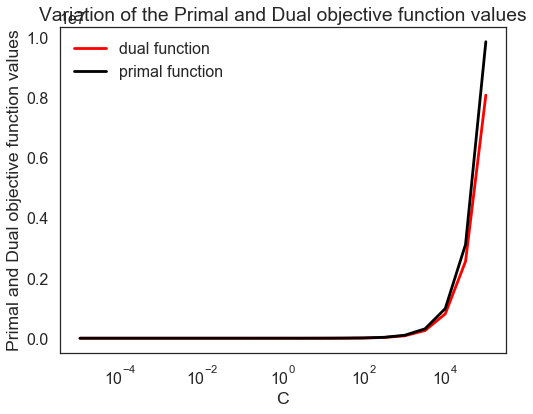

In [43]:
from sklearn.svm import LinearSVC

primal_clf = SVC(class_weight="balanced",kernel = "linear")
primal_clf.fit(X_train, y_train)
w = primal_clf.coef_
w_0 = primal_clf.intercept_

def hinge(x):
    return max(0,1-x)

def objective_function(w,w0,C):
    hinge_sum = 0
    for i in range(len(y_train)):
        hinge_sum += hinge(y_train[i]*(np.dot(w,X_train[i])+w0))
    return (1/2)*np.linalg.norm(w)**2 + C*hinge_sum

dual_clf = LinearSVC(dual = True)
dual_clf.fit(X_train, y_train)
w_dual = dual_clf.coef_
w_0_dual = dual_clf.intercept_

dual_list = []
primal_list = []

for i in np.arange(-5,5.5,0.5):
    dual_list.append(objective_function(w_dual,w_0, 10**i))
    primal_list.append(objective_function(w,w_0_dual,10**i))

plt.figure()
plt.plot([10**i for i in np.arange(-5,5.5,0.5)], dual_list, color = "r", label = "dual function")
plt.plot([10**i for i in np.arange(-5,5.5,0.5)], primal_list, color = "k", label = "primal function")
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Primal and Dual objective function values")
plt.title("Variation of the Primal and Dual objective function values")
plt.legend(loc = "best")
plt.show()

# Question 10 - modifying the tol

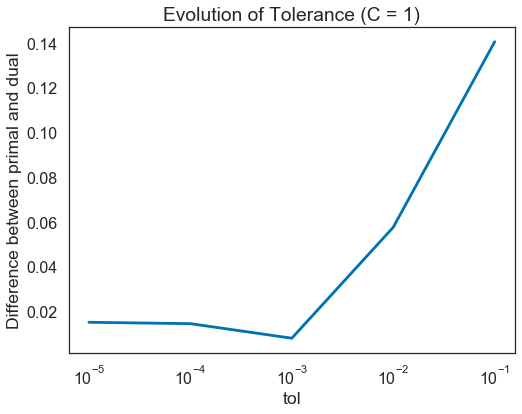

In [42]:
from sklearn.svm import LinearSVC
primal_clf = SVC(class_weight="balanced", kernel = "linear")
primal_clf.fit(X_train, y_train)
w = primal_clf.coef_
w_0 = primal_clf.intercept_

diff_list = []

for puiss in range(-5,0):
    tl = 10**puiss

    new_primal_clf = SVC(class_weight="balanced", kernel = "linear", tol = tl)
    new_primal_clf.fit(X_train, y_train)
    new_w = new_primal_clf.coef_
    new_w_0 = new_primal_clf.intercept_
    
    new_dual_clf = LinearSVC(dual = True, tol = tl)
    new_dual_clf.fit(X_train, y_train)
    new_dual_w = new_dual_clf.coef_
    new_dual_w_0 = new_dual_clf.intercept_
    
    diff_list.append(abs(objective_function(new_w,new_w_0,1) - objective_function(new_dual_w,new_dual_w_0, 1)))
    
plt.figure()
plt.plot([10**i for i in range(-5,0)], diff_list)
plt.xscale("log")
plt.xlabel("tol")
plt.ylabel("Difference between primal and dual")
plt.title("Evolution of Tolerance (C = 1)")
plt.show()